# Slide-seq

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [3]:
import BINARY

In [4]:
import pysodb
sodb = pysodb.SODB()

In [5]:
# Define names of the dataset_name and experiment_name
dataset_name = 'stickels2020highly'
experiment_name = 'stickels2021highly_Slide-seqV2_Mouse_Hippocampus_Puck_200115_08'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
adata_raw = sodb.load_experiment(dataset_name,experiment_name)

load experiment[stickels2021highly_Slide-seqV2_Mouse_Hippocampus_Puck_200115_08] in dataset[stickels2020highly]


In [6]:
adata_raw

AnnData object with n_obs × n_vars = 53208 × 23264
    obs: 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [7]:
adata = BINARY.clean_adata(adata_raw)
adata

AnnData object with n_obs × n_vars = 53208 × 23264
    obsm: 'spatial'

In [8]:
adata.var_names_make_unique()

In [9]:
adata = BINARY.Count2Binary(adata)

In [11]:
BINARY.Construct_Spatial_Graph(adata, 
                               use_method='KNN', 
                               cutoff=23)

------Constructing spatial graph...------
The graph contains 1223784 edges, 53208 cells.
23.0000 neighbors per cell on average.


In [12]:
adata = BINARY.train_BINARY(adata, pos_weight= 10, device= 'cuda:0')

Size of Input:  (53208, 3000)


100%|██████████| 1000/1000 [02:33<00:00,  6.53it/s]


In [13]:
sc.pp.neighbors(adata, use_rep='BINARY')
sc.tl.umap(adata)

In [14]:
optimal_resolution = BINARY.find_optimal_resolution(adata, desired_clusters=10, algorithm="leiden", add_key=None, start=0, end=5, step=1, max_iter=50)

The optimal resolution is: 0.224609375
Stored in adata.obs[leiden]: leiden


In [15]:
sc.tl.leiden(adata, resolution= optimal_resolution)

(-119.124, 5960.444, -125.922, 6031.482)

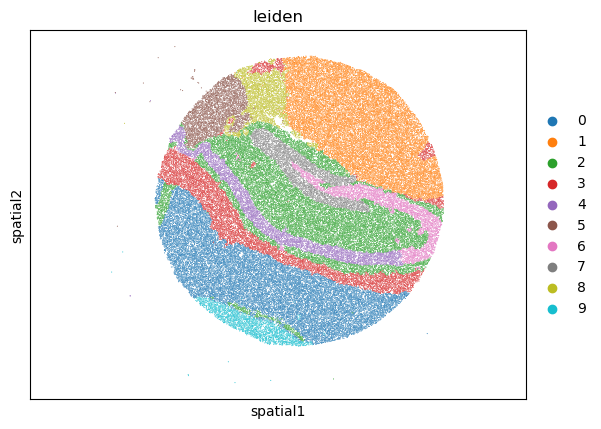

In [21]:
ax = sc.pl.embedding(adata, basis='spatial', color='leiden', size = 2, show=False)
ax.axis('equal')